In [563]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import re

### 1. Process and Expore data set

In [564]:
df=pd.read_csv('laptop_20230708.csv', encoding= 'unicode_escape')
df.tail(100)

,Price,Name,CPU,RAM,HardDisk
306,"2,599.00",MSI Raider GE77 HX 12UGS-257KH,i9 12900HX,32,2048
307,"4,399.00",MSI Raider GE78 HX 13VH-023KH,i9 13950HX,64,4096
308,"1,999.00",MSI Stealth 16Studio A13VF-202KH,I7 13700H,16,1024
309,"2,499.00",MSI Stealth 17 Studio A13VG-030KH,I7 13700H,32,1024
310,"3,999.00",MSI Stealth 17 Studio A13VH,I9 13900H,32,2048
...,...,...,...,...,...
401,b'499.00',b'',b'IntelÂ® Coreâ¢ i3',b'4',b'512'
402,b'499.00',b'MSI Modern 14 C12M',b'IntelÂ® Coreâ¢ i3',b'4',b'512'
403,b'769.00',b'IdeaPad Gaming 3 15ARH7Â ',b'None',b'8',b'512'
404,"b'1,639.00'",b'Legion Slim 5 16IRH8',b'None',b'16',b'512'


In [565]:
df.describe()

,Price,Name,CPU,RAM,HardDisk
count,406,406,406,406,406
unique,199,326,167,13,13
top,"1,399.00",MacBook Pro 13,b'IntelÂ® Coreâ¢ i9',16,512
freq,8,7,18,141,188


In [566]:
df.shape

(406, 5)

In [567]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     406 non-null    object
 1   Name      406 non-null    object
 2   CPU       406 non-null    object
 3   RAM       406 non-null    object
 4   HardDisk  406 non-null    object
dtypes: object(5)
memory usage: 16.0+ KB


### 2.Convert datatype

In [568]:

#df['Price'] = df['Price'].str.replace('$','')
replace_dict = {"$":"", ",": "","b":"","'":"","Â":""}

for old, new in replace_dict.items():
    df['Price'] = df['Price'].str.replace(old, new)
    df['Name'] = df['Name'].str.replace(old,new)
    df['CPU'] = df['CPU'].str.replace(old, new)
    df['RAM'] = df['RAM'].str.replace(old,new)
    df['HardDisk'] = df['HardDisk'].str.replace(old,new)

#df['Price'] = df['Price'].apply(lambda x: x.decode('utf-8')).str.replace(',', '').astype(float)

# convert the price column to float values
df['Price'] = df['Price'].astype(float)
df['RAM'] = df['RAM'].astype(float)
df['HardDisk'] = df['HardDisk'].astype(float)

C:\Users\kul.vannda\AppData\Local\Temp\ipykernel_27624\3818113488.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace(old, new)
C:\Users\kul.vannda\AppData\Local\Temp\ipykernel_27624\3818113488.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Name'] = df['Name'].str.replace(old,new)
C:\Users\kul.vannda\AppData\Local\Temp\ipykernel_27624\3818113488.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['CPU'] = df['CPU'].str.replace(old, new)
C:\Users\kul.vannda\AppData\Local\T

In [569]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     406 non-null    float64
 1   Name      406 non-null    object 
 2   CPU       406 non-null    object 
 3   RAM       406 non-null    float64
 4   HardDisk  406 non-null    float64
dtypes: float64(3), object(2)
memory usage: 16.0+ KB


In [570]:
df.head()

,Price,Name,CPU,RAM,HardDisk
0,319.0,Acer Aspire 3 A314-35-C2XJ,Celeron N4500,4.0,256.0
1,379.0,Acer Aspire 3 A315,i3 1115G4,8.0,256.0
2,339.0,Acer Aspire 3 A315-35,Celeron N5100,8.0,512.0
3,399.0,Acer Aspire 3 A315-510P,i3-N305,8.0,512.0
4,339.0,Acer Aspire 3 A315-510P,N100,8.0,256.0


In [571]:
df.isnull().sum()

Price       0
Name        0
CPU         0
RAM         0
HardDisk    0
dtype: int64

In [572]:
# filter rows and exclude columns containing the word "MacBook"

### 3.Split columns

In [573]:
# split the Name column into two columns based on space as the delimiter
df[['Model', 'Descript']] = df['Name'].str.split(n=1, expand=True)


df

,Price,Name,CPU,RAM,HardDisk,Model,Descript
0,319.0,Acer Aspire 3 A314-35-C2XJ,Celeron N4500,4.0,256.0,Acer,Aspire 3 A314-35-C2XJ
1,379.0,Acer Aspire 3 A315,i3 1115G4,8.0,256.0,Acer,Aspire 3 A315
2,339.0,Acer Aspire 3 A315-35,Celeron N5100,8.0,512.0,Acer,Aspire 3 A315-35
3,399.0,Acer Aspire 3 A315-510P,i3-N305,8.0,512.0,Acer,Aspire 3 A315-510P
4,339.0,Acer Aspire 3 A315-510P,N100,8.0,256.0,Acer,Aspire 3 A315-510P
...,...,...,...,...,...,...,...
401,499.0,,Intel® Coreâ¢ i3,4.0,512.0,None,None
402,499.0,MSI Modern 14 C12M,Intel® Coreâ¢ i3,4.0,512.0,MSI,Modern 14 C12M
403,769.0,IdeaPad Gaming 3 15ARH7,None,8.0,512.0,IdeaPad,Gaming 3 15ARH7
404,1639.0,Legion Slim 5 16IRH8,None,16.0,512.0,Legion,Slim 5 16IRH8


In [574]:
#def extract_processor_value(cpu_column):
#   pattern = r'^\b(\w+-?\w*)\b'
 #   processor_match = re.search(pattern, cpu_column, re.IGNORECASE)
#    if processor_match:
#        return processor_match.group(1)
#   else:
#        return None

In [575]:
#extract_processor_value(df['CPU'])

In [576]:
df = df.drop(columns=['Name', 'Descript','CPU'])
df

,Price,RAM,HardDisk,Model
0,319.0,4.0,256.0,Acer
1,379.0,8.0,256.0,Acer
2,339.0,8.0,512.0,Acer
3,399.0,8.0,512.0,Acer
4,339.0,8.0,256.0,Acer
...,...,...,...,...
401,499.0,4.0,512.0,None
402,499.0,4.0,512.0,MSI
403,769.0,8.0,512.0,IdeaPad
404,1639.0,16.0,512.0,Legion


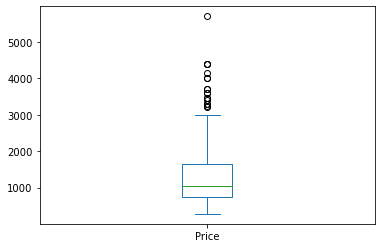

In [577]:
df['Price'].plot(kind='box')
plt.show()

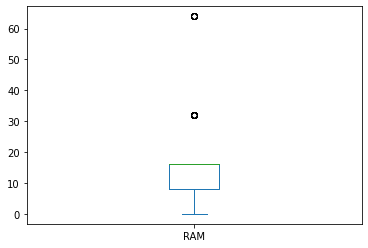

In [578]:
df['RAM'].plot(kind='box')
plt.show()

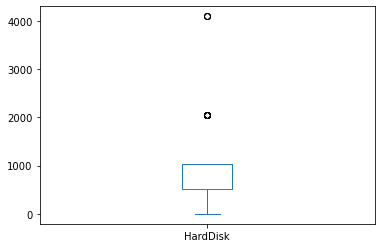

In [579]:
df['HardDisk'].plot(kind='box')
plt.show()

### 4.Label encoding

In [580]:
df['Model'].unique()

array(['Acer', 'AERO', 'AORUS', 'Asus', 'ASUS', 'Colorful', 'Dell',
       'DELL', 'GIGABHYTE', 'HP', 'HUAWEI', 'Lenovo', 'MacBook',
       'Microsoft', 'MSI', 'Razer', 'Samsung', 'XPG', 'MODEL', None,
       'IdeaPad', 'Legion'], dtype=object)

In [581]:
df['Model'] = df['Model'].str.upper()
df['Model'].unique()

array(['ACER', 'AERO', 'AORUS', 'ASUS', 'COLORFUL', 'DELL', 'GIGABHYTE',
       'HP', 'HUAWEI', 'LENOVO', 'MACBOOK', 'MICROSOFT', 'MSI', 'RAZER',
       'SAMSUNG', 'XPG', 'MODEL', None, 'IDEAPAD', 'LEGION'], dtype=object)

In [582]:
le = LabelEncoder() # create a new LabelEncoder object
df['Model No'] = le.fit_transform(df['Model']) # apply label encoding to the 'Model' column

In [583]:
df = df.drop(columns=['Model'])
df

,Price,RAM,HardDisk,Model No
0,319.0,4.0,256.0,0
1,379.0,8.0,256.0,0
2,339.0,8.0,512.0,0
3,399.0,8.0,512.0,0
4,339.0,8.0,256.0,0
...,...,...,...,...
401,499.0,4.0,512.0,19
402,499.0,4.0,512.0,15
403,769.0,8.0,512.0,9
404,1639.0,16.0,512.0,10


In [584]:
df['Model No'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 11, 12, 13, 15, 16, 17, 18, 14,
       19,  9, 10])

### 5.Transformation

C:\Users\kul.vannda\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kul.vannda\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kul.vannda\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

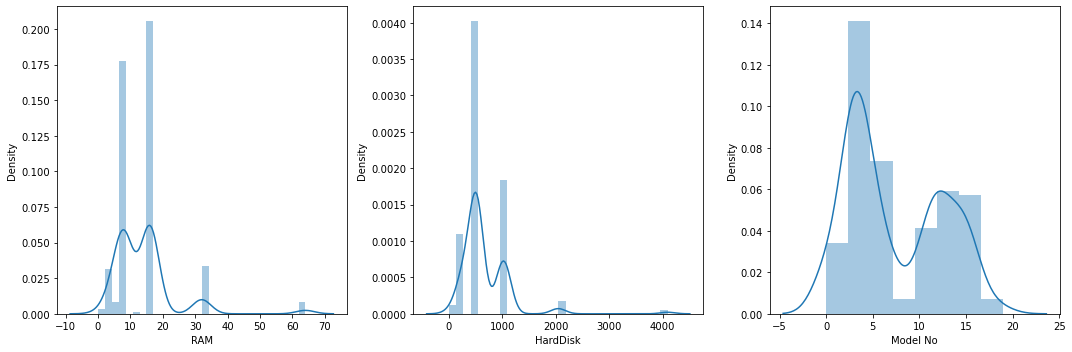

In [585]:

fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.distplot(df['RAM'], ax=axes[0])
sns.distplot(df['HardDisk'], ax=axes[1])
sns.distplot(df['Model No'], ax=axes[2])

plt.tight_layout()
plt.show()

In [586]:
df['RAM'] = np.sqrt(df['RAM'])
df['HardDisk'] = np.sqrt(df['HardDisk'])
df['Model No'] = np.sqrt(df['Model No'])
df

,Price,RAM,HardDisk,Model No
0,319.0,2.000000,16.000000,0.000000
1,379.0,2.828427,16.000000,0.000000
2,339.0,2.828427,22.627417,0.000000
3,399.0,2.828427,22.627417,0.000000
4,339.0,2.828427,16.000000,0.000000
...,...,...,...,...
401,499.0,2.000000,22.627417,4.358899
402,499.0,2.000000,22.627417,3.872983
403,769.0,2.828427,22.627417,3.000000
404,1639.0,4.000000,22.627417,3.162278


C:\Users\kul.vannda\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kul.vannda\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kul.vannda\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

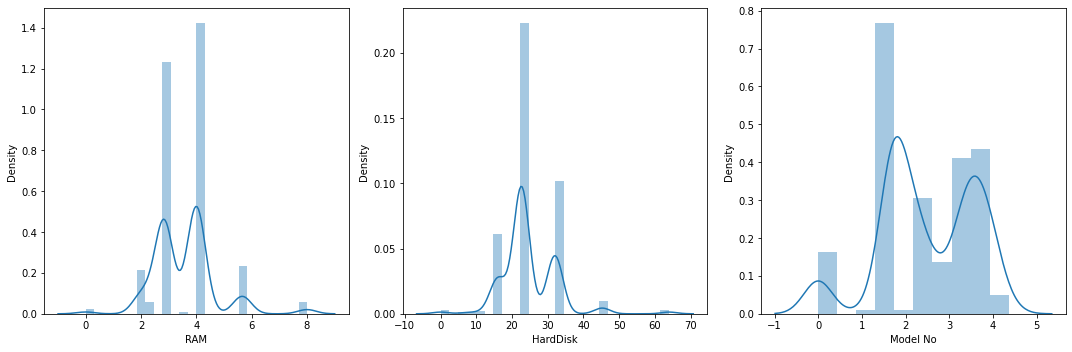

In [587]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.distplot(df['RAM'], ax=axes[0])
sns.distplot(df['HardDisk'], ax=axes[1])
sns.distplot(df['Model No'], ax=axes[2])

plt.tight_layout()
plt.show()

In [588]:
df.describe()

,Price,RAM,HardDisk,Model No
count,406.000000,406.000000,406.000000,406.000000
mean,1316.588670,3.548628,24.552294,2.471593
std,834.645016,1.109263,7.476063,1.094136
min,279.000000,0.000000,0.000000,0.000000
25%,739.000000,2.828427,22.627417,1.732051
50%,1054.000000,4.000000,22.627417,2.236068
75%,1654.000000,4.000000,32.000000,3.464102
max,5699.000000,8.000000,64.000000,4.358899


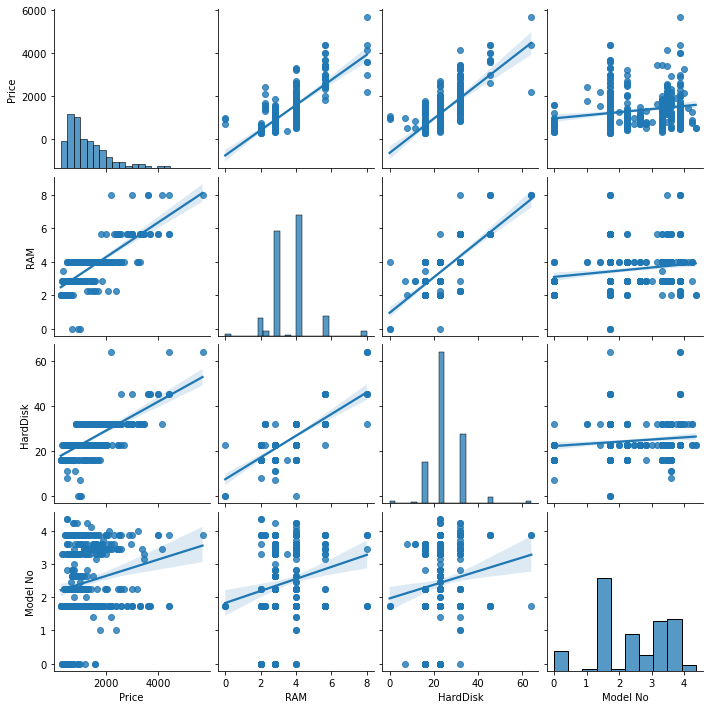

In [589]:
sns.pairplot(df, kind='reg');

<AxesSubplot:>

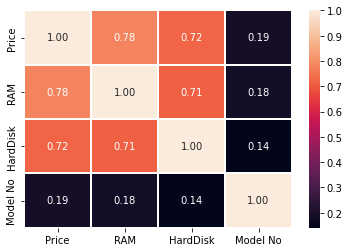

In [590]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2)

In [591]:
##scaler = StandardScaler() # create a new StandardScaler object
##df[['RAM', 'HardDisk', 'Model No']] = scaler.fit_transform(df[['RAM', 'HardDisk', 'Model No']])

In [592]:
df

,Price,RAM,HardDisk,Model No
0,319.0,2.000000,16.000000,0.000000
1,379.0,2.828427,16.000000,0.000000
2,339.0,2.828427,22.627417,0.000000
3,399.0,2.828427,22.627417,0.000000
4,339.0,2.828427,16.000000,0.000000
...,...,...,...,...
401,499.0,2.000000,22.627417,4.358899
402,499.0,2.000000,22.627417,3.872983
403,769.0,2.828427,22.627417,3.000000
404,1639.0,4.000000,22.627417,3.162278


In [593]:
df.describe()

,Price,RAM,HardDisk,Model No
count,406.000000,406.000000,406.000000,406.000000
mean,1316.588670,3.548628,24.552294,2.471593
std,834.645016,1.109263,7.476063,1.094136
min,279.000000,0.000000,0.000000,0.000000
25%,739.000000,2.828427,22.627417,1.732051
50%,1054.000000,4.000000,22.627417,2.236068
75%,1654.000000,4.000000,32.000000,3.464102
max,5699.000000,8.000000,64.000000,4.358899


### 6.Train and Test data

In [594]:
from sklearn.model_selection import train_test_split

In [595]:
## Splitting for X independent and Y as target variables:

Y = df['Price']
X = df.drop('Price', axis=1)

In [596]:
X.head()

,RAM,HardDisk,Model No
0,2.000000,16.000000,0.0
1,2.828427,16.000000,0.0
2,2.828427,22.627417,0.0
3,2.828427,22.627417,0.0
4,2.828427,16.000000,0.0


In [597]:
Y.head()

0    319.0
1    379.0
2    339.0
3    399.0
4    339.0
Name: Price, dtype: float64

In [598]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Step 3: Fit the model using the training set
model = LinearRegression()
model.fit(X_train, Y_train)

# Step 4: Use the model to make predictions on the testing set
Y_pred = model.predict(X_test)



In [599]:
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)
#ADD CODE

Coefficients:  [437.63292358  32.76490672  22.30125343]
Intercept:  -1074.8884522847468


In [600]:
# Step 5: Evaluate the model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print(f"R-Squared: {r2_score(Y_test, Y_pred)}")
print(f"MSE: {mean_squared_error(Y_test, Y_pred)}")
print(f"MAE: {mean_absolute_error(Y_test, Y_pred)}")


R-Squared: 0.6763822718728569
MSE: 197065.4144353994
MAE: 335.279438022899


In [616]:
data = [[8, 512,0]]

In [617]:
new_x = pd.DataFrame(data, columns=['RAM', 'HardDisk', 'Model No'])

In [618]:
new_x['RAM'] = np.sqrt(new_x['RAM'])
new_x['HardDisk'] = np.sqrt(new_x['HardDisk'])
new_x['Model No'] = np.sqrt(new_x['Model No'])

In [619]:

#scaler = StandardScaler() # create a new StandardScaler object
#new_x[['RAM', 'HardDisk', 'Model No']] = scaler.fit_transform(new_x[['RAM', 'HardDisk', 'Model No']])
new_x

,RAM,HardDisk,Model No
0,2.828427,22.627417,0.0


In [620]:
test = model.predict(new_x)
test

array([904.30958676])